# 3.6 A

$$ ||x||^{'} =  sup _{|| y || = 1} ||y * x|| $$ 

Now first we need to make sure that this is greater than or equal to 0.
There are two cases where x = 0 or x != 0, when x = 0 for all y this equation will be 0.
In x != 0 this equation only becomes 0 when the x is ortogonal to y and when they are not ortogonal, y is a unit vector in this norm, and $y * x$ is the length of x when it is projected onto y, since they are not ortogonal this length will be greater then 0.

Second $||x + z||^{'} <= ||x||^{'} +  ||z||^{'}$  should be proven.

$$ ||x + z||^{'} =  sup _{|| y || = 1} ||y * (x+z)|| $$ 
this equals to:

$$ ||x + z||^{'} =  sup _{|| y || = 1} ||y * x + y*z|| $$ 

since we know that ||.|| is a norm: 
$$||y*x + y*z|| <=||y*x|| +||y*z||$$ and 
$$sup _{|| y || = 1}||y*x + y*z|| <= sup _{|| y || = 1}||y*x|| +sup _{|| y || = 1}||y*z|| $$


because we knew that left side of the equation was already smaller than the right side when all the y's were same vector, we have taken all y for each such that ||y|| equals 1, and maximized them. Since right side is maximized with different y vectors they will still be greater or equal to right side, because in worst case they will have y vector equal to the one that maximizes the left side. 

lastly ||ax|| should be qual to |a| ||x||.
$$ ||ax||^{'} =  sup _{|| y || = 1} ||y *(ax)|| $$ 
$$ ||ax||^{'} =  sup _{|| y || = 1} ||a y * x|| $$
and again since ||.|| is a norm $||a y * x||$ equals to $|a| ||y * x||$
and we can take multiplication with |a| outside of sup since it does not depend on y and then it becomes equal to $|a| ||x||^{'}$

4.5

We need to show that if A is real, $A = U \Sigma V^{*}$ is real.

It is trivial to show that $ \Sigma $ is real, because in theorem 4.1 $\sigma_1 = ||A||_{2}$ thus the sigma are real.
And in fact without even A being real, $\Sigma$ was proven real in the book.

The left-singular vectors of A are a set of orthonormal eigenvectors of $AA^{T}$.
The right-singular vectors of A are a set of orthonormal eigenvectors of $M^{T}M$.

When A is real $A^{T}$ is real. And both U and V are real since a real valued matrix will have real valued orthonormal eigenvectors.



# 5.3 

## A
we can calculate $A^{'}A$ and take its eigenvalues with code

In [97]:
%matplotlib inline 
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import linalg as LA


A=np.matrix([[-2,11],[-10,5]])
B=A.T*A
C=A*A.T

w, v = LA.eig(B)

w2,u = LA.eig(C)
v=v.T

Sigma=[[math.sqrt(w[1]),0],[0,math.sqrt(w[0])]]
print "Sigma: ",Sigma

#we change orders because eigh sorts eigenvalues in increasing order rather than decreasing
V=[v[1].tolist()[0],v[0].tolist()[0]]
U=[u[1].tolist()[0],u[0].tolist()[0]]

V=np.matrix(V)
#reducing minus signs
V*=-1
print "V:",V

print "U:",U

#print np.matrix(U)*np.matrix(Sigma)*V


Sigma:  [[14.142135623730951, 0], [0, 7.0710678118654755]]
V: [[-0.6  0.8]
 [ 0.8  0.6]]
U: [[0.7071067811865474, 0.7071067811865476], [0.7071067811865476, -0.7071067811865474]]


## B
singular values:
14.142135623730951
7.0710678118654755

left singular vectors
[0.7071067811865474, 0.7071067811865476]
[0.7071067811865476, -0.7071067811865474]

right singular vectors
[-0.6  0.8]
[ 0.8  0.6]



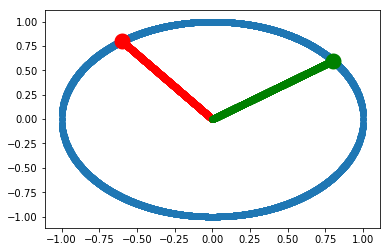

In [123]:
Xr=[]
Yr=[]
for x in range(-1000,1001):
    X=x/1000.
    Y=math.sqrt(1-X*X)
    Xr.append(X)
    Yr.append(Y)
    Xr.append(X)
    Yr.append(-Y)

plt.scatter(Xr,Yr)

Xr=[]
Yr=[]
for i in range(0,1001):
    o=i/1000.
    X=V[0,0]*o
    Y=V[0,1]*o
    Xr.append(X)
    Yr.append(Y)
    
plt.scatter(Xr,Yr,color="red")
plt.scatter(V[0,0],V[0,1],color="red",linewidth=10)


Xr=[]
Yr=[]
for i in range(0,1001):
    o=i/1000.
    X=V[1,0]*o
    Y=V[1,1]*o
    Xr.append(X)
    Yr.append(Y)
    
plt.scatter(Xr,Yr,color="green")
plt.scatter(V[1,0],V[1,1],color="green",linewidth=10)


plt.show()

here red and green lines correspond to the singular vectors

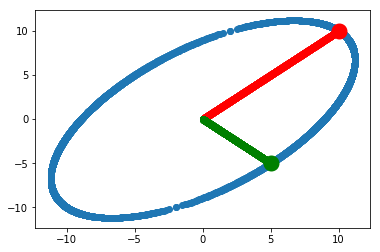

In [121]:
def multWithA(x,y):
    res=[]
    res.append(-2*x+11*y)
    res.append(-10*x+5*y)
    return res

Xr=[]
Yr=[]
for x in range(-1000,1001):
    X=x/1000.
    Y=math.sqrt(1-X*X)
    
    v=multWithA(X,Y)
    Xr.append(v[0])
    Yr.append(v[1])
    v=multWithA(X,-Y)
    Xr.append(v[0])
    Yr.append(v[1])

plt.scatter(Xr,Yr)

Xr=[]
Yr=[]
for i in range(0,1001):
    o=i/1000.
    X=V[0,0]*o
    Y=V[0,1]*o
    v=multWithA(X,Y)
    Xr.append(v[0])
    Yr.append(v[1])
    
plt.scatter(Xr,Yr,color="red")
v=multWithA(V[0,0],V[0,1])
plt.scatter(v[0],v[1],color="red",linewidth=10)


Xr=[]
Yr=[]
for i in range(0,1001):
    o=i/1000.
    X=V[1,0]*o
    Y=V[1,1]*o
    v=multWithA(X,Y)
    Xr.append(v[0])
    Yr.append(v[1])
    
plt.scatter(Xr,Yr,color="green",linewidth=1)

v=multWithA(V[1,0],V[1,1])
plt.scatter(v[0],v[1],color="green",linewidth=10)

plt.show()

here red and green lines correspond to the singular vectors after multiplication with A


## C

2 Norm is easy since it is Sigma[0,0], it equals to 14.142135623730951

1 Norm is max column sum which is 11+5 = 16

Inf norm is max row sum which is |-10| + 5 = 15

F form is the sqrt of the sum of every elementh to the power of 2

which is $sqrt(2*2+11*11+10*10+5*5) = 15.81138830084189665999$

## D

In [126]:
sinv=[[1./Sigma[0][0],0],[0,1./Sigma[1][1]]]
print V*np.matrix(sinv)*np.matrix(U).T

[[ 0.05 -0.11]
 [ 0.1  -0.02]]


## E

In [128]:
w3,v3=LA.eig(A)
print w3[0],w3[1]

(1.5+9.88685996664j) (1.5-9.88685996664j)


these are the eigenvalues of the A

## F


In [132]:
print LA.det(np.matrix(A))
print w3[0]*w3[1]

100.0
(100+0j)


clearly multiplication of eigenvalues are equal to the determinant of A

In [133]:
print Sigma[0][0]*Sigma[1][1]

100.0


and this value is equal to the absolute value of the determinant of A(actually since it is positive it directly equals to the determinant)

## G


In [134]:
print math.pi*100

314.159265359


is the area, since 100 is the multiplication of the lengths of the unit vectors in the new plane(like in $\pi * r^2)$